In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

KeyboardInterrupt: 

In [ ]:
# Fungsi untuk membersihkan komentar
def clean_comment(comment):
    # Menghapus karakter khusus, emotikon, dan simbol lainnya
    cleaned_comment = re.sub(r'[^\w\s]', '', comment)
    # Tokenisasi kata
    tokens = word_tokenize(cleaned_comment)
    #repalce 'yg' ke 'yang'
    tokens = [word.replace('yg', 'yang') if word == 'yg' else word for word in tokens]
    # Menghapus stopwords
    stopword_factory = StopWordRemoverFactory()
    stopwords = stopword_factory.get_stop_words()
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
    # Stemming kata
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Menggabungkan kembali token menjadi kalimat
    cleaned_comment = ' '.join(stemmed_tokens)
    return cleaned_comment

# Fungsi untuk menganalisis komentar
def analyze_comments(data):
    # Membersihkan komentar
    data['cleaned_comment'] = data['comment'].apply(clean_comment)
    # # Menghitung frekuensi kata-kata
    # word_freq = Counter(" ".join(data['cleaned_comment']).split()).most_common(10)
    # # Mencetak kata-kata yang paling sering muncul
    # print("Top 10 Kata yang Paling Sering Muncul:")
    # for word, freq in word_freq:
    #     print(f"{word}: {freq}")
    
    return data

In [ ]:
df = pd.read_csv("jurnal_comments_104520.csv")

In [ ]:
# Melakukan analisis komentar
df = analyze_comments(df)

In [44]:
df

,id,jurnal_id,user_id,parent_id,comment,like_count,userliked,is_publish,created_at,updated_at,cleaned_comment
0,184811,104520,118520,NaN,Mksh tipsnya Min,2,"[118520,1]",1,2024-04-09 10:52:04,2024-04-11 14:13:14,mksh tipsnya min
1,184812,104520,118520,NaN,👍👍👍,1,[118520],1,2024-04-09 10:52:13,2024-04-09 10:52:15,
2,184823,104520,134049,NaN,👍👍👍,1,[134049],1,2024-04-09 11:23:48,2024-04-09 11:24:02,
3,184824,104520,134049,NaN,👍👍👍,2,"[134049,1]",1,2024-04-09 11:23:54,2024-04-11 14:13:25,
4,184825,104520,134049,NaN,👍👍👍,1,[134049],1,2024-04-09 11:23:58,2024-04-09 11:24:01,
...,...,...,...,...,...,...,...,...,...,...,...
109,189262,104520,123195,NaN,Nice tips❤️,1,[1],1,2024-04-14 13:06:16,2024-04-15 13:03:37,nice tips
110,189658,104520,134691,NaN,ydusixb,1,[1],1,2024-04-15 00:11:24,2024-04-15 13:03:36,ydusixb
111,189659,104520,134691,NaN,hdhsish,0,NaN,1,2024-04-15 00:11:27,2024-04-15 00:11:27,hdhsish
112,189660,104520,134691,NaN,yshdis,0,NaN,1,2024-04-15 00:11:30,2024-04-15 00:11:30,yshdis


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat dan menampilkan WordCloud
def generate_wordcloud(data):
    # Menggabungkan semua komentar menjadi satu string
    text = " ".join(comment for comment in data['cleaned_comment'])
    # Membuat objek WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    # Menampilkan WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud dari Komentar')
    plt.show()

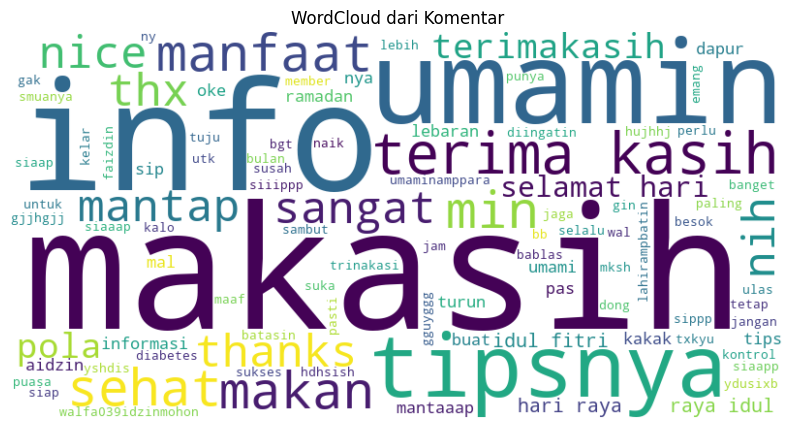

In [46]:
generate_wordcloud(df)